In [79]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, LayerNormalization, MultiHeadAttention, GlobalAveragePooling1D, Reshape
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [81]:

# Load the dataset
file_path = 'dataset_final.csv'
data = pd.read_csv(file_path)

In [83]:
data.head()

,Time,Temperature,Humidity,Air Quality,Light,Loudness
0,1623781306,37.94,28.94,75,644,106
1,1623781316,37.94,29.00,75,645,145
2,1623781326,37.88,28.88,75,644,146
3,1623781336,37.72,28.94,75,646,139
4,1623781346,37.69,29.19,75,644,155


In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6558 entries, 0 to 6557
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Time         6558 non-null   int64  
 1   Temperature  6558 non-null   float64
 2   Humidity     6558 non-null   float64
 3   Air Quality  6558 non-null   int64  
 4   Light        6558 non-null   int64  
 5   Loudness     6558 non-null   int64  
dtypes: float64(2), int64(4)
memory usage: 307.5 KB


In [87]:
data.describe()

,Time,Temperature,Humidity,Air Quality,Light,Loudness
count,6.558000e+03,6558.000000,6558.000000,6558.0,6558.000000,6558.000000
mean,1.623814e+09,27.549703,55.144913,75.0,631.581885,153.990851
std,1.893276e+04,6.202954,12.115001,0.0,6.857017,30.629140
min,1.623781e+09,22.190000,1.940000,75.0,625.000000,31.000000
25%,1.623798e+09,24.090000,53.455000,75.0,627.000000,138.000000
50%,1.623814e+09,25.000000,60.120000,75.0,629.000000,150.000000
75%,1.623830e+09,28.250000,63.380000,75.0,633.000000,163.000000
max,1.623847e+09,72.280000,71.810000,75.0,675.000000,498.000000


In [89]:
# Check for missing values
print(data.isnull().sum())


Time           0
Temperature    0
Humidity       0
Air Quality    0
Light          0
Loudness       0
dtype: int64


In [91]:
# Fill or drop missing values if any
# For this example, let's assume there are no missing values

# Split the dataset into features and target
X = data.drop(columns=['Temperature']).values
y = data['Temperature'].values


In [93]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [95]:
# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [97]:
# Define the MLP and Transformer model
def create_model(input_shape):
    inputs = Input(shape=input_shape)

    # MLP part
    x = Dense(128, activation='relu')(inputs)
    x = Dropout(0.2)(x)
    x = Dense(64, activation='relu')(x)
    x = Dropout(0.2)(x)

    # Reshape for transformer input
    x = Reshape((x.shape[1], 1))(x)

    # Transformer part
    transformer_layer = MultiHeadAttention(num_heads=4, key_dim=2)
    x = LayerNormalization(epsilon=1e-6)(x)
    x = transformer_layer(x, x)
    x = GlobalAveragePooling1D()(x)

    # Output layer
    outputs = Dense(1)(x)

    model = Model(inputs, outputs)
    return model


In [99]:
# Create and compile the model
input_shape = (X_train.shape[1],)
model = create_model(input_shape)
model.compile(optimizer='adam', loss='mean_squared_error')

In [103]:

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.25)


Epoch 1/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 40.0613 - val_loss: 39.8335
Epoch 2/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 35.7988 - val_loss: 39.6159
Epoch 3/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 39.3178 - val_loss: 39.6708
Epoch 4/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 37.4476 - val_loss: 39.6491
Epoch 5/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 37.4006 - val_loss: 39.6244
Epoch 6/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 37.6197 - val_loss: 39.6910
Epoch 7/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 36.9343 - val_loss: 39.6837
Epoch 8/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 36.3428 - val_loss: 39.6250
Epoch 9/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 35.7732 - val_loss: 39.5718
Epoch 10/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 35.7011 - val_loss: 39.5249


In [105]:
# Make predictions
y_pred = model.predict(X_test).flatten()


41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


In [107]:
y_pred

array([27.66057, 27.66057, 27.66057, ..., 27.66057, 27.66057, 27.66057],
      dtype=float32)

In [109]:
# Calculate regression metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [111]:
print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"R-squared (R2): {r2:.3f}")


Mean Squared Error (MSE): 41.425
Mean Absolute Error (MAE): 4.409
R-squared (R2): -0.000


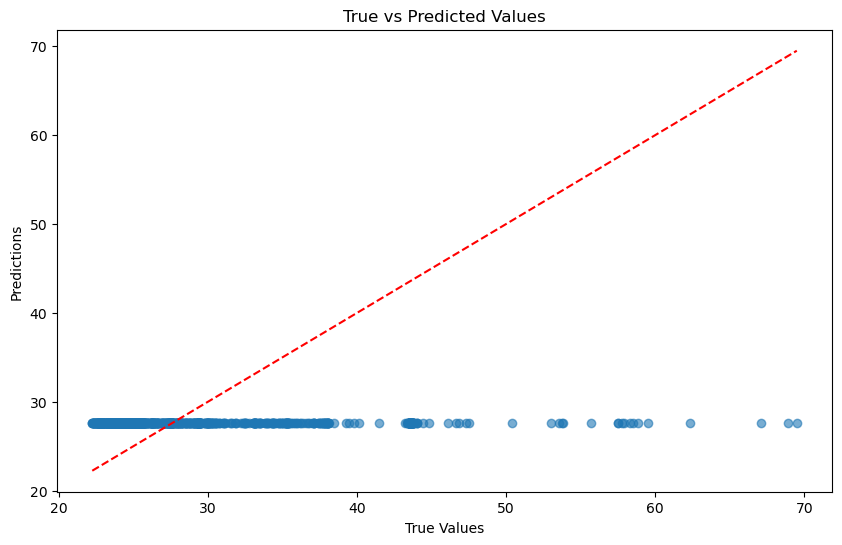

In [113]:
# Visualize the true vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs Predicted Values')
plt.show()

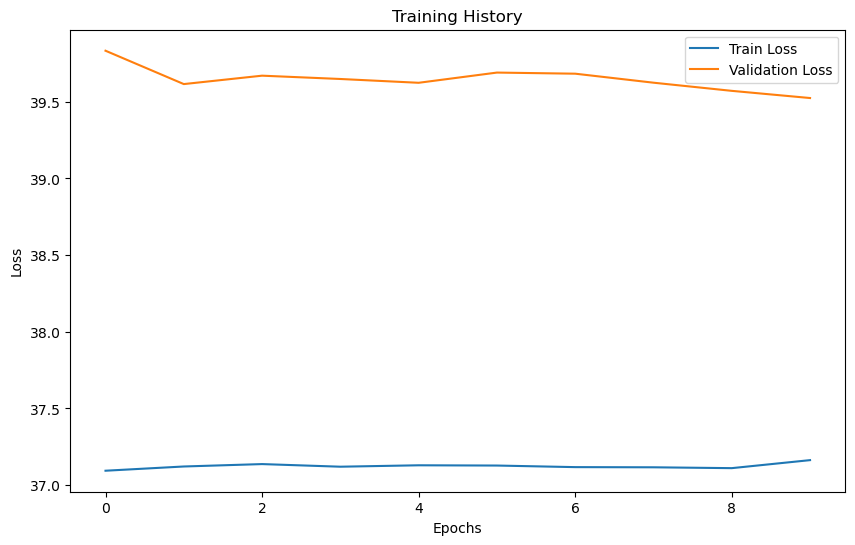

In [115]:
# Plot the training history
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training History')
plt.show()

In [117]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from hyperopt import hp, fmin, tpe, Trials


In [119]:
# Define the search space for hyperparameters
space = {
    'learning_rate': hp.loguniform('learning_rate', -5, 0),
    'batch_size': hp.quniform('batch_size', 16, 128, 16),
    'epochs': hp.quniform('epochs', 10, 50, 10),
    'dropout_rate': hp.uniform('dropout_rate', 0, 0.5),
    'optimizer': hp.choice('optimizer', ['adam', 'sgd', 'rmsprop'])
}

In [54]:
from keras.models import Sequential
from keras.layers import Dense

class MLP:
    def __init__(self, hidden_layers, dropout_rate):
        self.hidden_layers = hidden_layers
        self.dropout_rate = dropout_rate

    def build_model(self, input_shape):
        model = Sequential()
        for neurons in self.hidden_layers:
            model.add(Dense(neurons, activation='relu', input_shape=input_shape))
            model.add(Dropout(self.dropout_rate))
        model.add(Dense(1))  # output layer
        model.compile(optimizer='adam', loss='mean_squared_error')
        return model

In [55]:
import tensorflow.keras as keras
class CNN:
    def __init__(self, filters=[32, 64, 64], dense_units=128):
        super(CNNAutoencoder, self).__init__()
        self.encoder = keras.Sequential([
            keras.layers.Conv2D(filters[0], (3, 3), activation='relu', input_shape=(28, 28, 1)),
            keras.layers.MaxPooling2D((2, 2)),
            keras.layers.Conv2D(filters[1], (3, 3), activation='relu'),
            keras.layers.MaxPooling2D((2, 2)),
            keras.layers.Conv2D(filters[2], (3, 3), activation='relu')
        ])
        self.flatten = keras.layers.Flatten()
        self.dense1 = keras.layers.Dense(dense_units, activation='relu')
        self.dense2 = keras.layers.Dense(7 * 7 * filters[-1], activation='relu')
        self.reshape = keras.layers.Reshape((7, 7, filters[-1]))
        self.decoder = keras.Sequential([
            keras.layers.Conv2DTranspose(filters[-1], (3, 3), strides=2, padding='same', activation='relu'),
            keras.layers.Conv2DTranspose(filters[0], (3, 3), strides=2, padding='same', activation='relu'),
            keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')
        ])

    def call(self, inputs):
        x = self.encoder(inputs)
        x = self.flatten(x)
        x = self.dense1(x)
        x = self.dense2(x)
        x = self.reshape(x)
        return self.decoder(x)

In [56]:
class RNN:
    def __init__(self, units, num_classes):
        super(SimpleRNN, self).__init__()
        self.units = units
        self.embedding = keras.layers.Embedding(input_dim=num_classes, output_dim=units)
        self.rnn = keras.layers.SimpleRNN(units=self.units, return_sequences=False)
        self.fc = keras.layers.Dense(num_classes, activation='softmax')

    def call(self, inputs):
        x = self.embedding(inputs)
        x = self.rnn(x)
        return self.fc(x)

In [57]:
import tensorflow as tf
from tensorflow.keras.layers import Layer, Dense, Dropout, LayerNormalization, MultiHeadAttention

class MultiHeadSelfAttention(Layer):
    def __init__(self, embed_dim, num_heads):
        super(MultiHeadSelfAttention, self).__init__()
        self.embed_dim = embed_dim
        self.num_heads = num_heads
        assert embed_dim % num_heads == 0
        self.projection_dim = embed_dim // num_heads
        self.query_dense = Dense(embed_dim)
        self.key_dense = Dense(embed_dim)
        self.value_dense = Dense(embed_dim)
        self.combine_heads = Dense(embed_dim)

    def attention(self, query, key, value):
        score = tf.matmul(query, key, transpose_b=True)
        dim_key = tf.cast(tf.shape(key)[-1], tf.float32)
        scaled_score = score / tf.math.sqrt(dim_key)
        weights = tf.nn.softmax(scaled_score, axis=-1)
        output = tf.matmul(weights, value)
        return output, weights

    def separate_heads(self, x, batch_size):
        x = tf.reshape(x, (batch_size, -1, self.num_heads, self.projection_dim))
        return tf.transpose(x, perm=[0, 2, 1, 3])

    def call(self, inputs):
        batch_size = tf.shape(inputs)[0]
        query = self.query_dense(inputs)
        key = self.key_dense(inputs)
        value = self.value_dense(inputs)
        query = self.separate_heads(query, batch_size)
        key = self.separate_heads(key, batch_size)
        value = self.separate_heads(value, batch_size)
        attention, weights = self.attention(query, key, value)
        attention = tf.transpose(attention, perm=[0, 2, 1, 3])
        concat_attention = tf.reshape(attention, (batch_size, -1, self.embed_dim))
        output = self.combine_heads(concat_attention)
        return output

class TransformerBlock(Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super(TransformerBlock, self).__init__()
        self.att = MultiHeadSelfAttention(embed_dim, num_heads)
        self.ffn = tf.keras.Sequential(
            [Dense(ff_dim, activation="relu"), Dense(embed_dim),]
        )
        self.layernorm1 = LayerNormalization(epsilon=1e-6)
        self.layernorm2 = LayerNormalization(epsilon=1e-6)
        self.dropout1 = Dropout(rate)
        self.dropout2 = Dropout(rate)

    def call(self, inputs, training):
        attn_output = self.att(inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)

class Transformer(tf.keras.Model):
    def __init__(self, num_layers, embed_dim, num_heads, ff_dim, input_vocab_size, target_vocab_size, rate=0.1):
        super(Transformer, self).__init__()
        self.encoder = tf.keras.layers.Embedding(input_vocab_size, embed_dim)
        self.decoder = tf.keras.layers.Embedding(target_vocab_size, embed_dim)
        self.transformer_blocks = [TransformerBlock(embed_dim, num_heads, ff_dim, rate) for _ in range(num_layers)]
        self.flatten = tf.keras.layers.Flatten()
        self.fc = tf.keras.layers.Dense(target_vocab_size, activation='softmax')

    def call(self, inputs, training):
        input_seq, target_seq = inputs
        input_seq = self.encoder(input_seq)
        target_seq = self.decoder(target_seq)
        for transformer_block in self.transformer_blocks:
            input_seq = transformer_block(input_seq, training)
            target_seq = transformer_block(target_seq, training)
        output_seq = self.flatten(target_seq)
        return self.fc(output_seq)


In [65]:
from tensorflow.keras.layers import Layer, LSTM, GRU, Dense
# Define the models to compare
# models = [
#    {'model': MLP, 'params': {'hidden_layers': [128, 64], 'dropout_rate': 0.2}},
#    {'model': CNN, 'params': {'filter_sizes': [32, 64], 'pool_size': 2}},
#    {'model': RNN, 'params': {'recurrent_layers': [LSTM, GRU], 'dropout_rate': 0.2}},
#    {'model': Transformer, 'params': {'num_heads': 4, 'hidden_size': 128}}
#]

models = [
    {'model': MLP,},
    {'model': CNN,},
    {'model': RNN, },
    {'model': Transformer,},
]

In [67]:
# Perform hyperparameter tuning and cross-validation
trials = Trials()
best_model = None
best_score = float('inf')

In [75]:
from tensorflow.keras import Sequential
for model in models:
    def objective(params):
        X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
#        model_instance = model['model'](**model['params'], **params)
        model_instance = model['model']
        # Compile and fit the model
        model_instance.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

        history = model_instance.fit(X_train, y_train, epochs=params['epochs'], batch_size=params['batch_size'], validation_data=(X_val, y_val))
        score = mean_squared_error(y_val, model_instance.predict(X_val))
        return {'loss': score, 'status': STATUS_OK}

    best_params = fmin(objective, space, algo=tpe.suggest, trials=trials, max_evals=50)
    score = objective(best_params)['loss']
    if score < best_score:
        best_model = model
        best_score = score

  0%|          | 0/50 [00:00<?, ?trial/s, best loss=?]

job exception: type object 'MLP' has no attribute 'compile'



  0%|          | 0/50 [00:00<?, ?trial/s, best loss=?]


AttributeError: type object 'MLP' has no attribute 'compile'

In [ ]:
print(f'Best model: {best_model["model"].__name__} with score: {best_score:.4f}')